# sketch

In [1]:
from __future__ import print_function
import torch
from models import SketchModule
from utils import load_image, to_data, to_var, visualize, save_image, gaussian, weights_init
# from utils import load_train_batchfnames, prepare_text_batch

from utils import custom_load_train_batchfnames, prepare_text_batch

import time
import argparse
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

opts = argparse.ArgumentParser()
opts.GB_nlayers = 8
opts.DB_nlayers = 5
opts.GB_nf = 128
opts.DB_nf = 64
opts.gpu = True
opts.epochs = 6
opts.save_GB_name = '../save/GB_expt13.ckpt'
opts.batchsize = 32
opts.text_path = '../data/rawtext/yaheiB/train'
opts.augment_text_path = '../data/new_augment'
opts.text_datasize = 1760
opts.augment_text_datasize = 22
opts.Btraining_num = 25600






ep_320 = 1
ep_256 = 1
ep_192 = 0
ep_128 = 1
ep_64 = 1
ep_32 = 1

In [2]:
import torch
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torch.autograd import Variable
import numpy as np
import cv2
import scipy.ndimage as pyimg
import random
import os

In [3]:
fnames, fnames2 = custom_load_train_batchfnames(opts.text_path, opts.augment_text_path, opts.batchsize, opts.text_datasize, opts.augment_text_datasize, trainnum = opts.Btraining_num)

In [4]:
pil2tensor = transforms.Compose([
transforms.ToTensor(),
transforms.Normalize(mean=[0.5, 0.5, 0.5],std=[0.5,0.5,0.5])])
tensor2pil = transforms.ToPILImage()

### CUSTOM TRAINING LOOP

In [ ]:
print('--- create model ---')
netSketch = SketchModule(opts.GB_nlayers, opts.DB_nlayers, opts.GB_nf, opts.DB_nf, opts.gpu)
if opts.gpu:
    netSketch.cuda()
netSketch.init_networks(weights_init)
netSketch.train()

print('--- training ---')

##########################################################################################################

for epoch in range(ep_320):
    opts.batchsize = 8
    opts.Btraining_num = 6400
    curr_time = time.time()
    itr = 0
    fnames, fnames2 = custom_load_train_batchfnames(opts.text_path, opts.augment_text_path, opts.batchsize, opts.text_datasize, opts.augment_text_datasize, trainnum = opts.Btraining_num)
    
    for ii in range(len(fnames)):
        fnames[ii][0:opts.batchsize//8-1] = fnames2[ii][0:opts.batchsize//8-1]
    
    for fname in fnames:
        random.shuffle(fname)
        itr += 1
        t = prepare_text_batch(fname, 320, 320, anglejitter=True)
        t = to_var(t) if opts.gpu else t
        losses = netSketch.one_pass(t, [l/4.-1. for l in range(0,9)])
        print('Epoch [%d/%d][%03d/%03d]' %(epoch+1, opts.epochs, itr, len(fnames)), end=': ')
        print('LDadv: %+.3f, LGadv: %+.3f, Lrec: %+.3f'%(losses[0], losses[1], losses[2]))

    end_time = time.time()
    print('Epoch = ', epoch+1, 'time taken = ', str(end_time - curr_time))

##########################################################################################################

    
for epoch in range(ep_256):
    opts.batchsize = 32
    opts.Btraining_num = 12800
    curr_time = time.time()
    itr = 0
    fnames, fnames2 = custom_load_train_batchfnames(opts.text_path, opts.augment_text_path, opts.batchsize, opts.text_datasize, opts.augment_text_datasize, trainnum = opts.Btraining_num)
    
    for ii in range(len(fnames)):
        fnames[ii][0:opts.batchsize//8-1] = fnames2[ii][0:opts.batchsize//8-1]
    
    for fname in fnames:
        random.shuffle(fname)
        itr += 1
        t = prepare_text_batch(fname, 256, 256, anglejitter=True)
        t = to_var(t) if opts.gpu else t
        losses = netSketch.one_pass(t, [l/4.-1. for l in range(0,9)])
        print('Epoch [%d/%d][%03d/%03d]' %(epoch+1, opts.epochs, itr, len(fnames)), end=': ')
        print('LDadv: %+.3f, LGadv: %+.3f, Lrec: %+.3f'%(losses[0], losses[1], losses[2]))

    end_time = time.time()
    print('Epoch = ', epoch+1, 'time taken = ', str(end_time - curr_time))

##########################################################################################################


    
for epoch in range(ep_192):
    opts.batchsize = 32
    opts.Btraining_num = 12800
    curr_time = time.time()
    itr = 0
    fnames, fnames2 = custom_load_train_batchfnames(opts.text_path, opts.augment_text_path, opts.batchsize, opts.text_datasize, opts.augment_text_datasize, trainnum = opts.Btraining_num)
    
    for ii in range(len(fnames)):
        fnames[ii][0:opts.batchsize//8-1] = fnames2[ii][0:opts.batchsize//8-1]
    
    for fname in fnames:
        random.shuffle(fname)
        itr += 1
        t = prepare_text_batch(fname, 192, 192, anglejitter=True)
        t = to_var(t) if opts.gpu else t
        losses = netSketch.one_pass(t, [l/4.-1. for l in range(0,9)])
        print('Epoch [%d/%d][%03d/%03d]' %(epoch+1, opts.epochs, itr, len(fnames)), end=': ')
        print('LDadv: %+.3f, LGadv: %+.3f, Lrec: %+.3f'%(losses[0], losses[1], losses[2]))

    end_time = time.time()
    print('Epoch = ', epoch+1, 'time taken = ', str(end_time - curr_time))
    

##########################################################################################################

    
for epoch in range(ep_128):
    opts.batchsize = 64
    opts.Btraining_num = 25600
    curr_time = time.time()
    itr = 0
    fnames, fnames2 = custom_load_train_batchfnames(opts.text_path, opts.augment_text_path, opts.batchsize, opts.text_datasize, opts.augment_text_datasize, trainnum = opts.Btraining_num)
    
    for ii in range(len(fnames)):
        fnames[ii][0:opts.batchsize//8-1] = fnames2[ii][0:opts.batchsize//8-1]
    
    for fname in fnames:
        random.shuffle(fname)
        itr += 1
        t = prepare_text_batch(fname, 128, 128, anglejitter=True)
        t = to_var(t) if opts.gpu else t
        losses = netSketch.one_pass(t, [l/4.-1. for l in range(0,9)])
        print('Epoch [%d/%d][%03d/%03d]' %(epoch+1, opts.epochs, itr, len(fnames)), end=': ')
        print('LDadv: %+.3f, LGadv: %+.3f, Lrec: %+.3f'%(losses[0], losses[1], losses[2]))

    end_time = time.time()
    print('Epoch = ', epoch+1, 'time taken = ', str(end_time - curr_time))

##########################################################################################################

    
for epoch in range(ep_64):
    opts.batchsize = 64
    opts.Btraining_num = 12800
    curr_time = time.time()
    itr = 0
    fnames, fnames2 = custom_load_train_batchfnames(opts.text_path, opts.augment_text_path, opts.batchsize, opts.text_datasize, opts.augment_text_datasize, trainnum = opts.Btraining_num)
    
    for ii in range(len(fnames)):
        fnames[ii][0:opts.batchsize//8-1] = fnames2[ii][0:opts.batchsize//8-1]
    
    for fname in fnames:
        random.shuffle(fname)
        itr += 1
        t = prepare_text_batch(fname, 64, 64, anglejitter=True)
        t = to_var(t) if opts.gpu else t
        losses = netSketch.one_pass(t, [l/4.-1. for l in range(0,9)])
        print('Epoch [%d/%d][%03d/%03d]' %(epoch+1, opts.epochs, itr, len(fnames)), end=': ')
        print('LDadv: %+.3f, LGadv: %+.3f, Lrec: %+.3f'%(losses[0], losses[1], losses[2]))

    end_time = time.time()
    print('Epoch = ', epoch+1, 'time taken = ', str(end_time - curr_time))

##########################################################################################################

      
for epoch in range(ep_32):
    opts.batchsize = 128
    opts.Btraining_num = 12800
    curr_time = time.time()
    itr = 0
    fnames, fnames2 = custom_load_train_batchfnames(opts.text_path, opts.augment_text_path, opts.batchsize, opts.text_datasize, opts.augment_text_datasize, trainnum = opts.Btraining_num)
    
    for ii in range(len(fnames)):
        fnames[ii][0:opts.batchsize//8-1] = fnames2[ii][0:opts.batchsize//8-1]
    
    for fname in fnames:
        random.shuffle(fname)
        itr += 1
        t = prepare_text_batch(fname, 32, 32, anglejitter=True)
        t = to_var(t) if opts.gpu else t
        losses = netSketch.one_pass(t, [l/4.-1. for l in range(0,9)])
        print('Epoch [%d/%d][%03d/%03d]' %(epoch+1, opts.epochs, itr, len(fnames)), end=': ')
        print('LDadv: %+.3f, LGadv: %+.3f, Lrec: %+.3f'%(losses[0], losses[1], losses[2]))

    end_time = time.time()
    print('Epoch = ', epoch+1, 'time taken = ', str(end_time - curr_time))
        

##########################################################################################################


print('--- save ---')
# directory
torch.save(netSketch.state_dict(), opts.save_GB_name)




In [5]:
# create model
print('--- create model ---')
netSketch = SketchModule(opts.GB_nlayers, opts.DB_nlayers, opts.GB_nf, opts.DB_nf, opts.gpu)
if opts.gpu:
    netSketch.cuda()
netSketch.init_networks(weights_init)
netSketch.train()

print('--- training ---')
for epoch in range(opts.epochs):
    curr_time = time.time()
    itr = 0
    fnames, fnames2 = custom_load_train_batchfnames(opts.text_path, opts.augment_text_path, opts.batchsize, opts.text_datasize, opts.augment_text_datasize, trainnum = opts.Btraining_num)
    
    for ii in range(len(fnames)):
        fnames[ii][0:opts.batchsize//8-1] = fnames2[ii][0:opts.batchsize//8-1]
    
    for fname in fnames:
        random.shuffle(fname)
        itr += 1
        t = prepare_text_batch(fname, anglejitter=True)
        t = to_var(t) if opts.gpu else t
        losses = netSketch.one_pass(t, [l/4.-1. for l in range(0,9)])
        print('Epoch [%d/%d][%03d/%03d]' %(epoch+1, opts.epochs, itr, len(fnames)), end=': ')
        print('LDadv: %+.3f, LGadv: %+.3f, Lrec: %+.3f'%(losses[0], losses[1], losses[2]))

    end_time = time.time()
    print('Epoch = ', epoch+1, 'time taken = ', str(end_time - curr_time))
    print('--- save ---')
    # directory
    torch.save(netSketch.state_dict(), opts.save_GB_name + str(epoch))

--- create model ---


KeyboardInterrupt: 

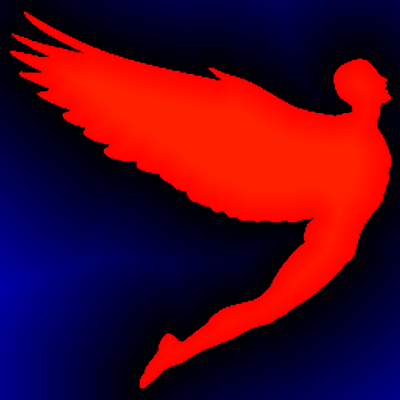

In [6]:
# file_name_to_test = '/home/abhirag/cv_project/experiment/data/test_logos_processed/apivita.png'
# file_name_to_test = '/home/abhirag/cv_project/experiment/data/rawtext/yaheiB/train/swift.png'
file_name_to_test = '/home/abhirag/cv_project/experiment/data/test_logos_processed/persevoyages.png'
Image.open(file_name_to_test)

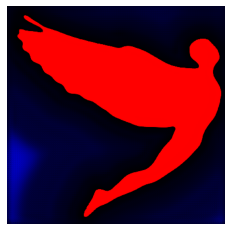

In [7]:
netSketch = SketchModule(8, 5, 128, 64, opts.gpu)
if opts.gpu:
    netSketch.cuda()
netSketch.init_networks(weights_init)
netSketch.train()

# theirs

netSketch.load_state_dict(torch.load('/home/abhirag/cv_project/experiment/save/GB_exp15.ckpt'))

# ours

# netSketch.load_state_dict(torch.load('../save/GB.ckpt'))


netSketch.eval()
I = load_image(file_name_to_test)
I = to_var(I[:,:,:,0:I.size(3)])
result = netSketch(I, -1.)
visualize(to_data(result[0]))

In [ ]:
# netSketch = SketchModule(opts.GB_nlayers, opts.DB_nlayers, opts.GB_nf, opts.DB_nf, opts.gpu)
# if opts.gpu:
#     netSketch.cuda()
# netSketch.init_networks(weights_init)
# netSketch.train()

# # theirs

# # netSketch.load_state_dict(torch.load('/home/abhirag/cv_project/ShapeMGAN-data_plus_model/save/GB-iccv.ckpt'))

# # ours

# netSketch.load_state_dict(torch.load('../save/experiment1/GB.ckpt5'))


# netSketch.eval()
# I = load_image(file_name_to_test)
# I = to_var(I[:,:,:,0:I.size(3)])
# result = netSketch(I, -1.)
# visualize(to_data(result[0]))

In [8]:
def track_progress_over_epochs(checkpoints_dir, gb_layers, db_layers, gb_features, db_features):

    I = load_image(file_name_to_test)
    I = to_var(I[:,:,:,0:I.size(3)])

    a = []

    for ckpt in [os.path.join(checkpoints_dir, i) for i in os.listdir(checkpoints_dir)]:
        netSketch = SketchModule(gb_layers, db_layers, gb_features, db_features, opts.gpu)
        if opts.gpu:
            netSketch.cuda()
        netSketch.init_networks(weights_init)
        netSketch.train()
        netSketch.load_state_dict(torch.load(ckpt))
        netSketch.eval()
        result = netSketch(I, -1.)
        a.append(((to_data(result[0]).numpy().transpose(1, 2, 0) + 1.0) * 127.5).astype(np.uint8))
        del netSketch

    x = np.hstack(tuple(a))
    
    return x

In [9]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

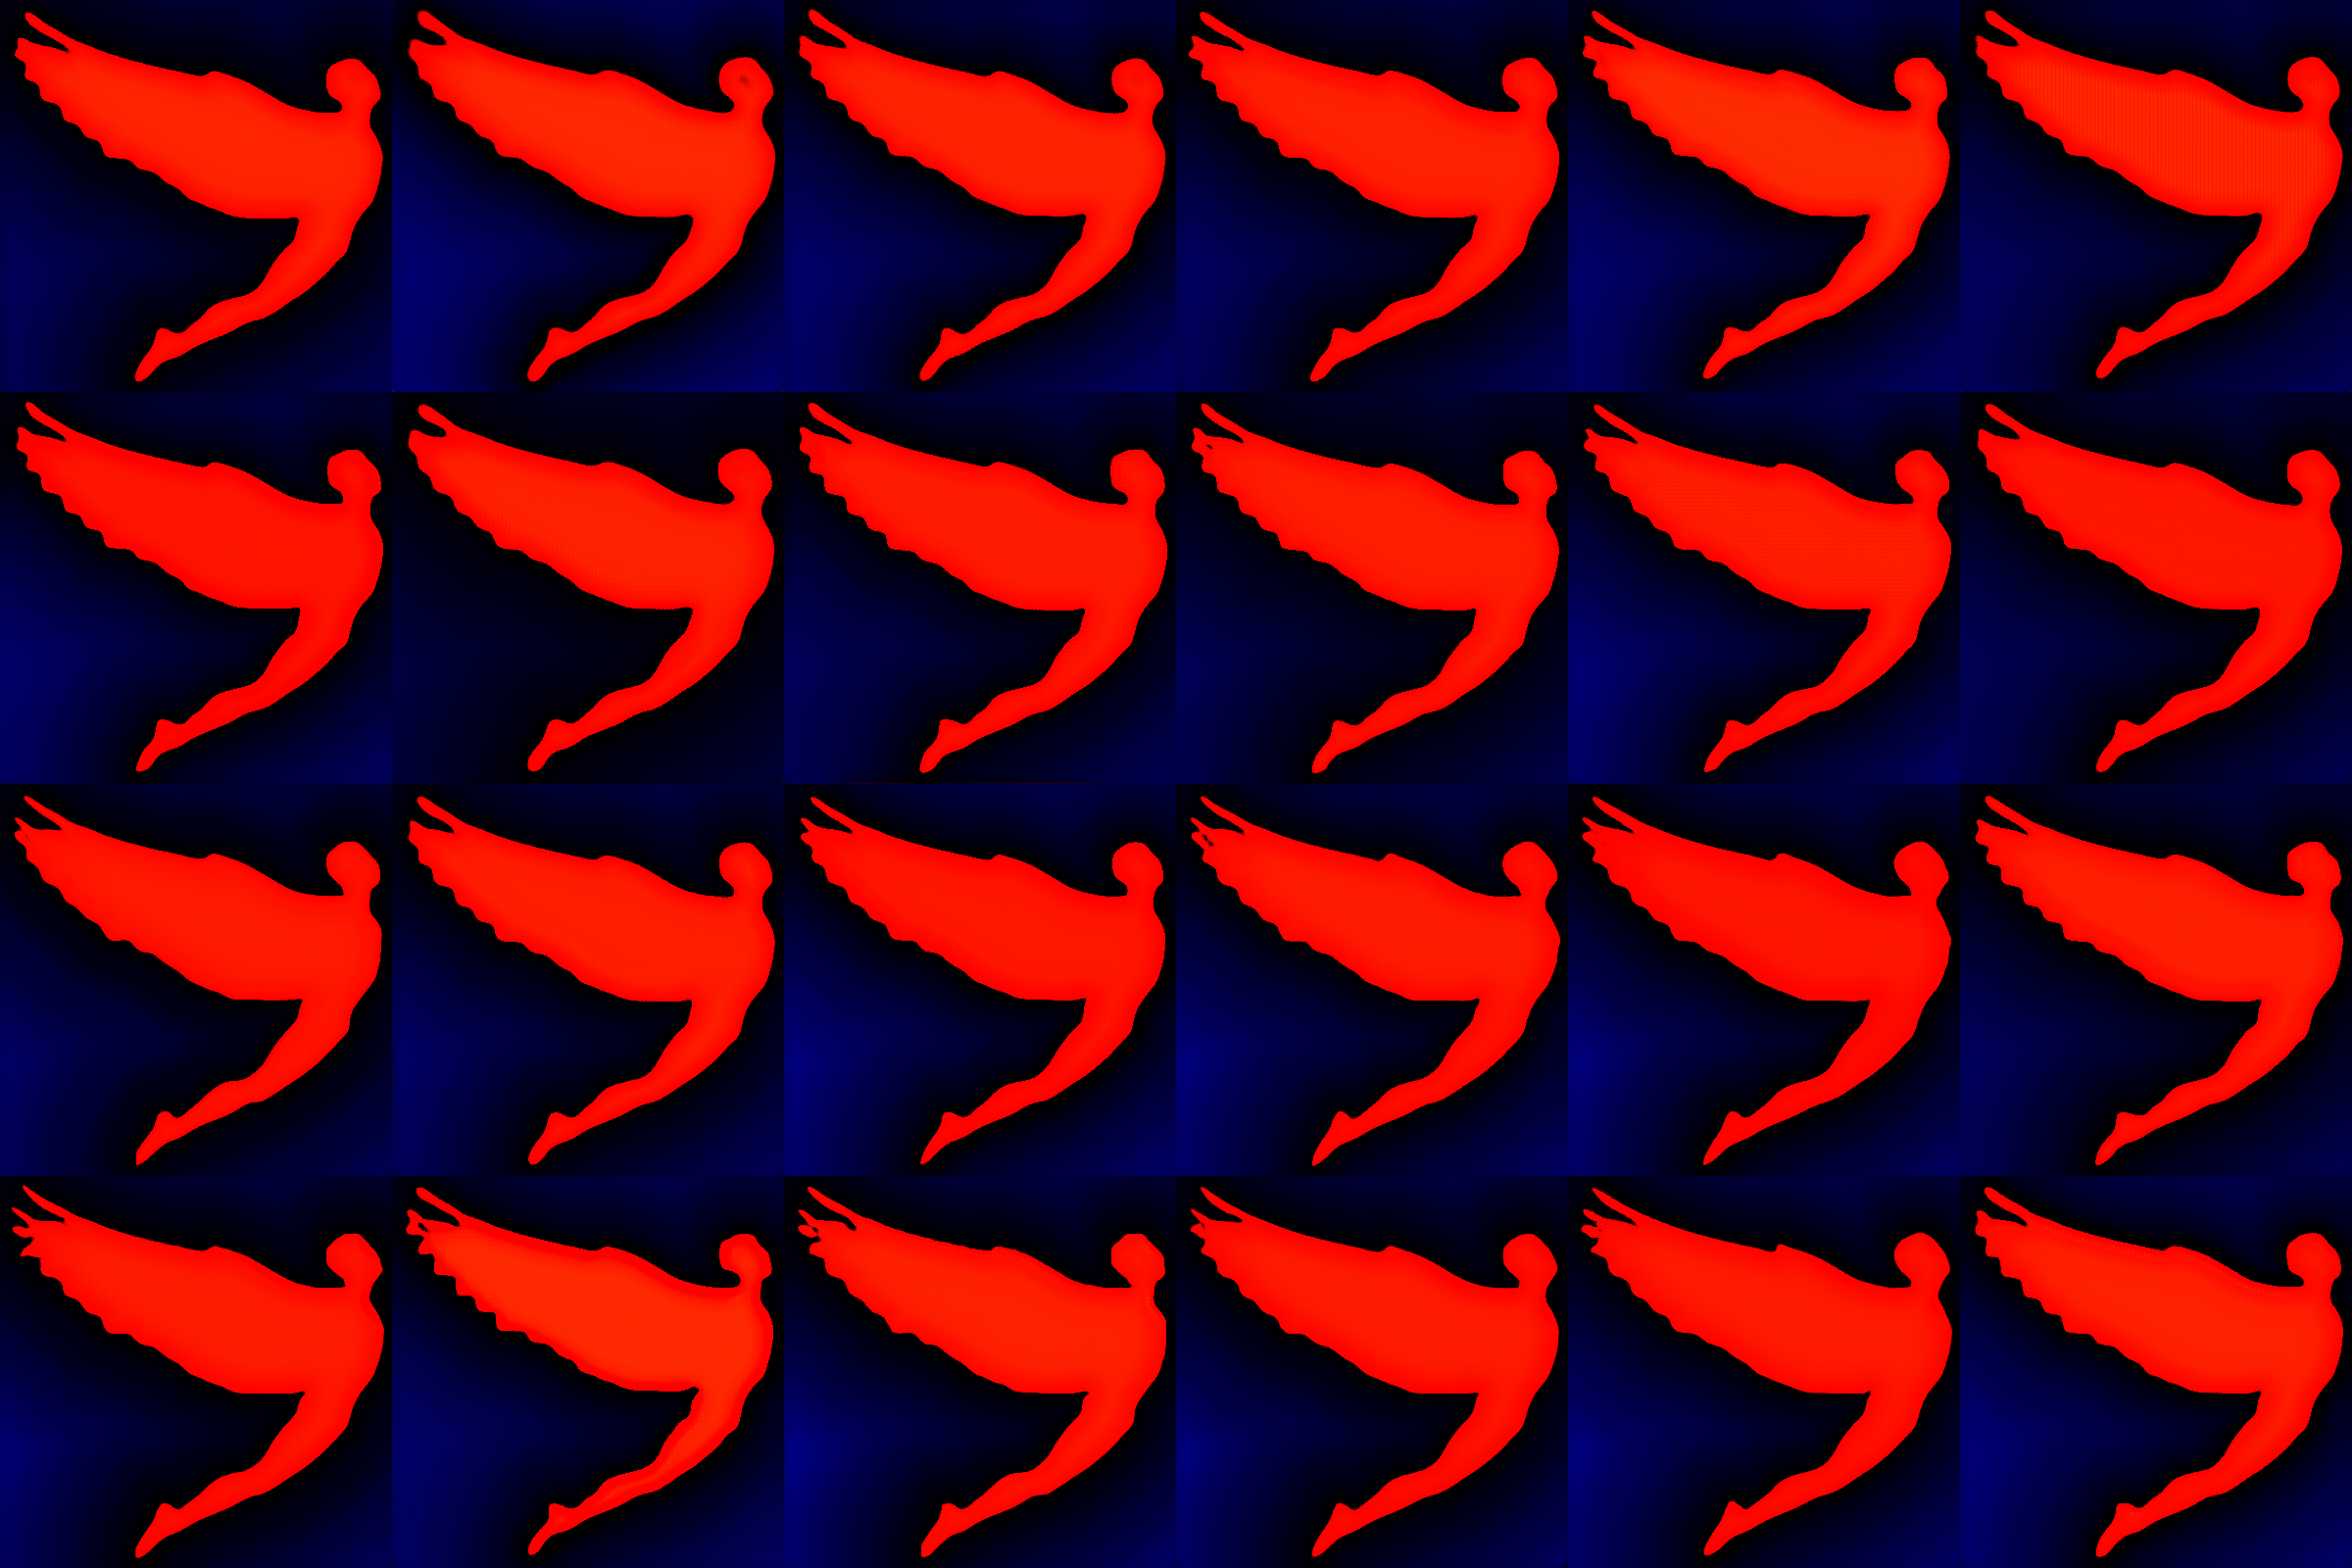

In [10]:
dir1 = '/home/abhirag/cv_project/experiment/save/experiment1'
dir2 = '/home/abhirag/cv_project/experiment/save/experiment2'
dir3 = '/home/abhirag/cv_project/experiment/save/experiment3'
dir4 = '/home/abhirag/cv_project/experiment/save/experiment4'
dir5 = '/home/abhirag/cv_project/experiment/save/experiment5'
dir6 = '/home/abhirag/cv_project/experiment/save/experiment6'
dir7 = '/home/abhirag/cv_project/experiment/save/experiment7'
dir8 = '/home/abhirag/cv_project/experiment/save/experiment8'
dir9 = '/home/abhirag/cv_project/experiment/save/experiment9'
dir10 = '/home/abhirag/cv_project/experiment/save/experiment10'
dir11 = '/home/abhirag/cv_project/experiment/save/experiment11'
dir12 = '/home/abhirag/cv_project/experiment/save/experiment12'

# x = [dir1, dir2, dir3, dir4, dir5] 
# x = [dir6, dir8]

a = []

a.append(track_progress_over_epochs(dir8, 6, 5, 32, 32))
    
a.append(track_progress_over_epochs(dir10, 6, 5, 64, 64))

a.append(track_progress_over_epochs(dir11, 7, 5, 64, 64))

a.append(track_progress_over_epochs(dir12, 8, 5, 128, 64))
    
Image.fromarray(np.vstack(tuple(a)))

# structure

In [ ]:
from __future__ import print_function
import torch
from models import SketchModule, ShapeMatchingGAN
from utils import load_image, to_data, to_var, visualize, save_image, gaussian, weights_init
from utils import load_train_batchfnames, prepare_text_batch, load_style_image_pair, cropping_training_batches
import random
import argparse
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

opts = argparse.ArgumentParser()
# SMGAN
opts.GS_nlayers = 6
opts.DS_nlayers = 4
opts.GS_nf = 32
opts.DS_nf = 32
opts.GT_nlayers = 6
opts.DT_nlayers = 4
opts.GT_nf = 32
opts.DT_nf = 32

# SketchModule
opts.GB_nlayers = 6
opts.DB_nlayers = 5
opts.GB_nf = 32
opts.DB_nf = 32
opts.load_GB_name = '../save/GB.ckpt'

# train 
opts.gpu = True
opts.step1_epochs = 30
opts.step2_epochs = 40
opts.step3_epochs = 80
opts.step4_epochs = 10
opts.batchsize = 16
opts.Straining_num = 2560
opts.scale_num = 4
opts.Sanglejitter = True
opts.subimg_size = 256
opts.glyph_preserve = False
opts.text_datasize = 708
opts.text_path = '../data/rawtext/yaheiB/train'

# data and path
opts.save_path = '../save/'
opts.save_name = 'maple'
opts.style_name = '../data/style/maple.png'


# create model
print('--- create model ---')
netShapeM = ShapeMatchingGAN(opts.GS_nlayers, opts.DS_nlayers, opts.GS_nf, opts.DS_nf,
                 opts.GT_nlayers, opts.DT_nlayers, opts.GT_nf, opts.DT_nf, opts.gpu)
netSketch = SketchModule(opts.GB_nlayers, opts.DB_nlayers, opts.GB_nf, opts.DB_nf, opts.gpu)

if opts.gpu:
    netShapeM.cuda()
    netSketch.cuda()
netShapeM.init_networks(weights_init)
netShapeM.train()

netSketch.load_state_dict(torch.load(opts.load_GB_name))
netSketch.eval()

print('--- training ---')
# load image pair
scales = [l*2.0/(opts.scale_num-1)-1 for l in range(opts.scale_num)]
Xl, X, _, Noise = load_style_image_pair(opts.style_name, scales, netSketch, opts.gpu)
Xl = [to_var(a) for a in Xl] if opts.gpu else Xl
X = to_var(X) if opts.gpu else X
Noise = to_var(Noise) if opts.gpu else Noise



for epoch in range(opts.step1_epochs):
    for i in range(opts.Straining_num/opts.batchsize):
        idx = opts.scale_num-1
        xl, x = cropping_training_batches(Xl[idx], X, Noise, opts.batchsize, 
                                  opts.Sanglejitter, opts.subimg_size, opts.subimg_size)
        losses = netShapeM.structure_one_pass(x, xl, scales[idx])
        print('Step1, Epoch [%02d/%02d][%03d/%03d]' %(epoch+1, opts.step1_epochs, i+1, 
                                                      opts.Straining_num/opts.batchsize), end=': ')
        print('LDadv: %+.3f, LGadv: %+.3f, Lrec: %+.3f, Lgly: %+.3f'%(losses[0], losses[1], losses[2], losses[3]))
        
        
        
netShapeM.G_S.myCopy()




for epoch in range(opts.step2_epochs):
    for i in range(opts.Straining_num/opts.batchsize):
        idx = random.choice([0, opts.scale_num-1])
        xl, x = cropping_training_batches(Xl[idx], X, Noise, opts.batchsize, 
                                  opts.Sanglejitter, opts.subimg_size, opts.subimg_size)
        losses = netShapeM.structure_one_pass(x, xl, scales[idx])
        print('Step2, Epoch [%02d/%02d][%03d/%03d]' %(epoch+1, opts.step2_epochs, i+1, 
                                                      opts.Straining_num/opts.batchsize), end=': ')
        print('LDadv: %+.3f, LGadv: %+.3f, Lrec: %+.3f, Lgly: %+.3f'%(losses[0], losses[1], losses[2], losses[3]))
for epoch in range(opts.step3_epochs):
    for i in range(opts.Straining_num/opts.batchsize):
        idx = random.choice(range(opts.scale_num))
        xl, x = cropping_training_batches(Xl[idx], X, Noise, opts.batchsize, 
                                  opts.Sanglejitter, opts.subimg_size, opts.subimg_size)
        losses = netShapeM.structure_one_pass(x, xl, scales[idx])  
        print('Step3, Epoch [%02d/%02d][%03d/%03d]' %(epoch+1, opts.step3_epochs, i+1, 
                                                      opts.Straining_num/opts.batchsize), end=': ')
        print('LDadv: %+.3f, LGadv: %+.3f, Lrec: %+.3f, Lgly: %+.3f'%(losses[0], losses[1], losses[2], losses[3]))
if opts.glyph_preserve:
    fnames = load_train_batchfnames(opts.text_path, opts.batchsize, 
                                    opts.text_datasize, opts.Straining_num)
    for epoch in range(opts.step4_epochs):
        itr = 0
        for fname in fnames:
            itr += 1
            t = prepare_text_batch(fname, anglejitter=False)
            idx = random.choice(range(opts.scale_num))
            xl, x = cropping_training_batches(Xl[idx], X, Noise, opts.batchsize, 
                                      opts.Sanglejitter, opts.subimg_size, opts.subimg_size)
            t = to_var(x) if opts.gpu else t
            losses = netShapeM.structure_one_pass(x, xl, scales[idx], t)  
            print('Step4, Epoch [%02d/%02d][%03d/%03d]' %(epoch+1, opts.step4_epochs, itr+1, 
                                                      len(fnames)), end=': ')
            print('LDadv: %+.3f, LGadv: %+.3f, Lrec: %+.3f, Lgly: %+.3f'%(losses[0], losses[1], losses[2], losses[3])) 
        
print('--- save ---')
# directory
netShapeM.save_structure_model(opts.save_path, opts.save_name)

In [ ]:
netShapeM.eval()
I = load_image('../data/rawtext/yaheiB/val/0801.png')
I = to_var(I[:,:,32:288,32:288])
I[:,0:1] = gaussian(I[:,0:1], stddev=0.2)
result = netShapeM.G_S(I, 1.0)
visualize(to_data(result[0]))

# texture 

In [ ]:
from __future__ import print_function
import torch
from models import SketchModule, ShapeMatchingGAN
from utils import load_image, to_data, to_var, visualize, save_image, gaussian, weights_init
from utils import load_train_batchfnames, prepare_text_batch, load_style_image_pair, cropping_training_batches
import random
from vgg import get_GRAM, VGGFeature
import torchvision.models as models
import argparse
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

opts = argparse.ArgumentParser()
# SMGAN
opts.GS_nlayers = 6
opts.DS_nlayers = 4
opts.GS_nf = 32
opts.DS_nf = 32
opts.GT_nlayers = 6
opts.DT_nlayers = 4
opts.GT_nf = 32
opts.DT_nf = 32

# train 
opts.gpu = True
opts.texture_step1_epochs = 40
opts.texture_step2_epochs = 10
opts.batchsize = 4
opts.Ttraining_num = 800
opts.Tanglejitter = True
opts.subimg_size = 256
opts.style_loss = False
opts.text_path = '../data/rawtext/yaheiB/train'
opts.text_datasize = 708
opts.augment_text_path_path = '../data/rawtext/augment'
opts.augment_text_datasize = 5


# data and path
opts.save_path = '../save/'
opts.save_name = 'maple'
opts.style_name = '../data/style/maple.png'
opts.load_GS_name = '../save/maple-GS-iccv.ckpt'

# create model
print('--- create model ---')
netShapeM = ShapeMatchingGAN(opts.GS_nlayers, opts.DS_nlayers, opts.GS_nf, opts.DS_nf,
                 opts.GT_nlayers, opts.DT_nlayers, opts.GT_nf, opts.DT_nf, opts.gpu)

if opts.gpu:
    netShapeM.cuda()
netShapeM.init_networks(weights_init)
netShapeM.train()

if opts.style_loss:
    netShapeM.G_S.load_state_dict(torch.load(opts.load_GS_name))  
    netShapeM.G_S.eval()
    VGGNet = models.vgg19(pretrained=True).features
    VGGfeatures = VGGFeature(VGGNet, opts.gpu)
    for param in VGGfeatures.parameters():
        param.requires_grad = False
    if opts.gpu:
        VGGfeatures.cuda()
    style_targets = get_GRAM(opts.style_name, VGGfeatures, opts.batchsize, opts.gpu)
    
print('--- training ---')
# load image pair
_, X, Y, Noise = load_style_image_pair(opts.style_name, gpu=opts.gpu)
Y = to_var(Y) if opts.gpu else Y
X = to_var(X) if opts.gpu else X
Noise = to_var(Noise) if opts.gpu else Noise
for epoch in range(opts.texture_step1_epochs):
    for i in range(opts.Ttraining_num/opts.batchsize):
        x, y = cropping_training_batches(X, Y, Noise, opts.batchsize, 
                                  opts.Tanglejitter, opts.subimg_size, opts.subimg_size)
        losses = netShapeM.texture_one_pass(x, y)
        print('Step1, Epoch [%02d/%02d][%03d/%03d]' %(epoch+1, opts.texture_step1_epochs, i+1,
                                                     opts.Ttraining_num/opts.batchsize), end=': ')
        print('LDadv: %+.3f, LGadv: %+.3f, Lrec: %+.3f, Lsty: %+.3f'%(losses[0], losses[1], losses[2], losses[3])) 
if opts.style_loss:
    fnames = load_train_batchfnames(opts.text_path, opts.batchsize, 
                                    opts.text_datasize, trainnum=opts.Ttraining_num)
    for epoch in range(opts.texture_step2_epochs):
        itr = 0
        for fname in fnames:
            itr += 1
            t = prepare_text_batch(fname, anglejitter=False)
            x, y = cropping_training_batches(X, Y, Noise, opts.batchsize, 
                                  opts.Tanglejitter, opts.subimg_size, opts.subimg_size)
            t = to_var(t) if opts.gpu else t
            losses = netShapeM.texture_one_pass(x, y, t, 0, VGGfeatures, style_targets)  
            print('Step2, Epoch [%02d/%02d][%03d/%03d]' %(epoch+1, opts.texture_step2_epochs, 
                                                         itr, len(fnames)), end=': ')
            print('LDadv: %+.3f, LGadv: %+.3f, Lrec: %+.3f, Lsty: %+.3f'%(losses[0], losses[1], losses[2], losses[3])) 
        
print('--- save ---')
# directory
netShapeM.save_texture_model(opts.save_path, opts.save_name)

In [ ]:
netShapeM.G_S.load_state_dict(torch.load('../save/maple-GS-iccv.ckpt'))  
netShapeM.eval()
I = load_image('../data/rawtext/yaheiB/val/0801.png')
I = to_var(I[:,:,32:288,32:288])
result = netShapeM(I, 1)
visualize(to_data(result[0]))